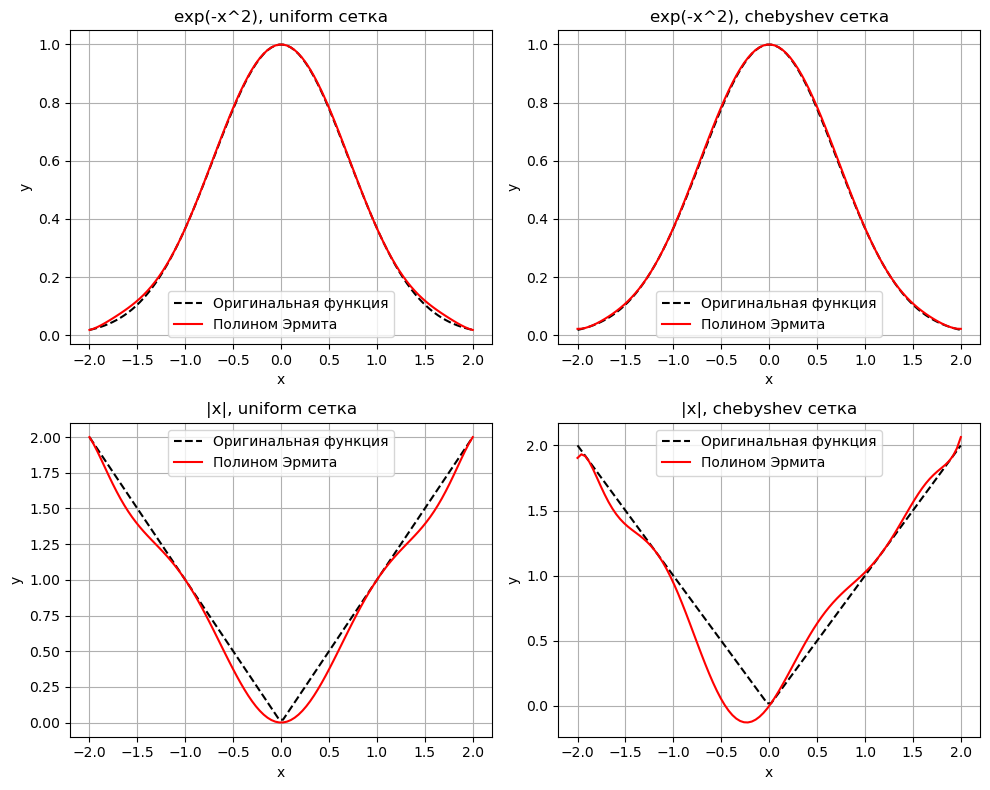

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("interpolation_data.txt", dtype=str, delimiter=" ")
data = data[1:]

x = data[:, 0].astype(float)
y_real = data[:, 1].astype(float)
y_hermite = data[:, 2].astype(float)
grid_type = data[:, 3]  
function_type = data[:, 4]  
cases = [("uniform", "exp(-x^2)"), ("chebyshev", "exp(-x^2)"),
         ("uniform", "|x|"), ("chebyshev", "|x|")]

plt.figure(figsize=(10, 8))

for i, (grid, func) in enumerate(cases, 1):
    mask = (grid_type == grid) & (function_type == func)
    x_case = x[mask]
    y_real_case = y_real[mask]
    y_hermite_case = y_hermite[mask]

    plt.subplot(2, 2, i)
    plt.plot(x_case, y_real_case, label="Оригинальная функция", color="black", linestyle="dashed")
    plt.plot(x_case, y_hermite_case, label="Полином Эрмита", color="red")
    plt.title(f"{func}, {grid} сетка")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


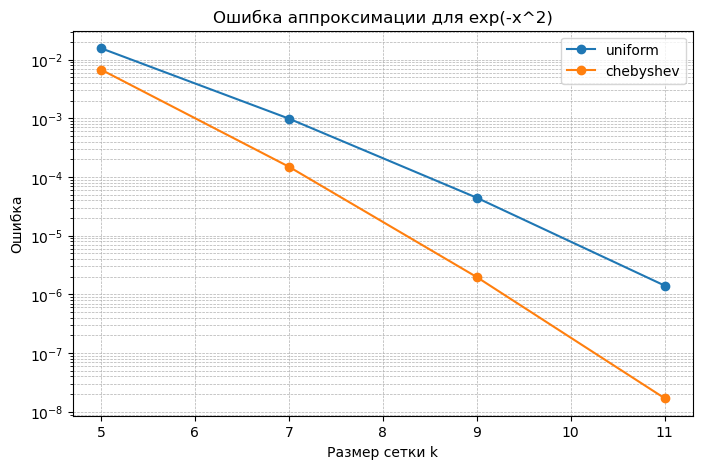

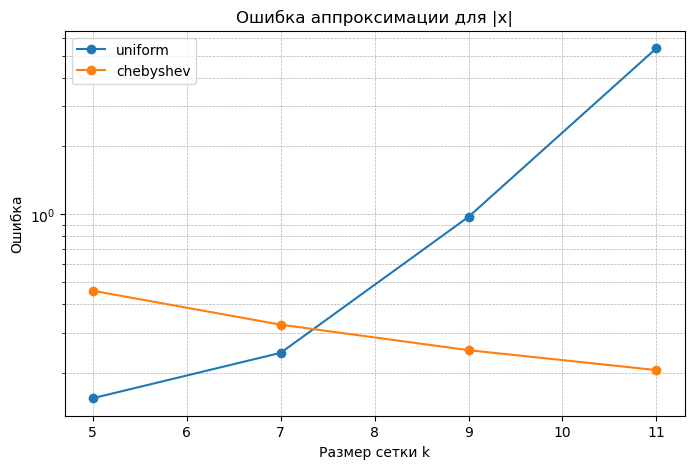

In [14]:
import matplotlib.pyplot as plt
import numpy as np

data = {
    5: {"uniform": {"exp(-x^2)": 0.0157012, "|x|": 0.154202}, "chebyshev": {"exp(-x^2)": 0.00678757, "|x|": 0.459409}},
    7: {"uniform": {"exp(-x^2)": 0.000992462, "|x|": 0.244544}, "chebyshev": {"exp(-x^2)": 0.000150308, "|x|": 0.325495}},
    9: {"uniform": {"exp(-x^2)": 4.44828e-05, "|x|": 0.973253}, "chebyshev": {"exp(-x^2)": 1.97871e-06, "|x|": 0.251226}},
    11: {"uniform": {"exp(-x^2)": 1.41709e-06, "|x|": 5.39742}, "chebyshev": {"exp(-x^2)": 1.70468e-08, "|x|": 0.205218}}
}

ks = sorted(data.keys())


def plot_error(function_name):
    plt.figure(figsize=(8, 5))
    for grid_type in ["uniform", "chebyshev"]:
        errors = [data[k][grid_type][function_name] for k in ks]
        plt.plot(ks, errors, marker='o', label=grid_type)
    
    plt.yscale('log')  
    plt.xlabel("Размер сетки k")
    plt.ylabel("Ошибка")
    plt.title(f"Ошибка аппроксимации для {function_name}")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

target_functions = ["exp(-x^2)", "|x|"]
for func in target_functions:
    plot_error(func)


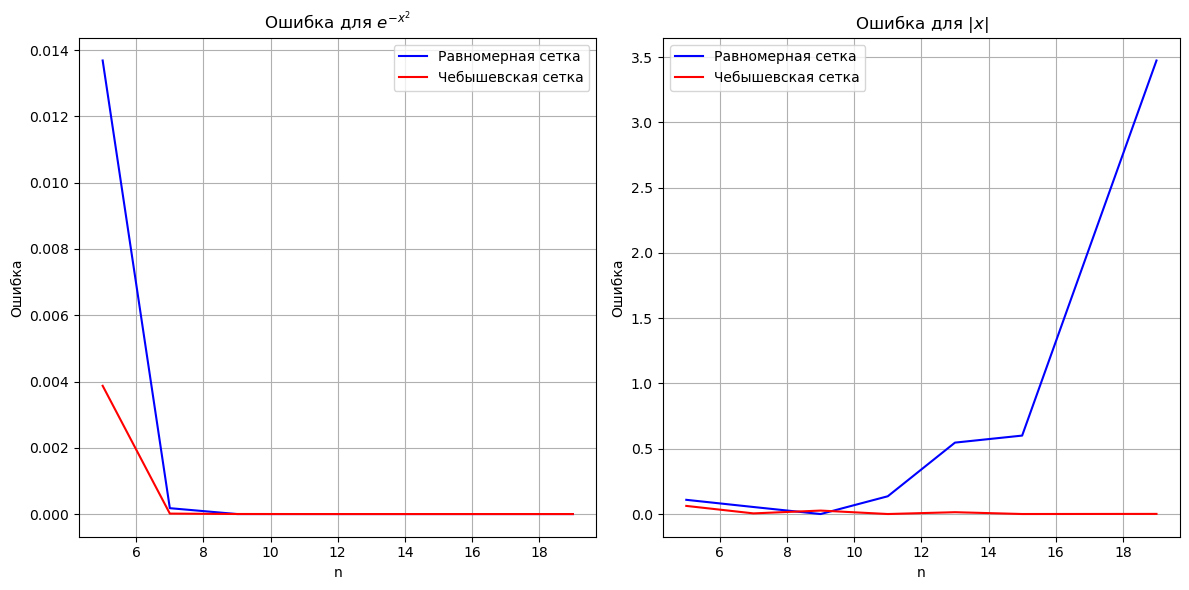

In [4]:
import matplotlib.pyplot as plt

def read_errors(filename):
    n_values = []
    errors_f1_uniform = []
    errors_f1_chebyshev = []
    errors_f2_uniform = []
    errors_f2_chebyshev = []

    with open(filename, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            if lines[i].startswith("n ="):
                n = int(lines[i].split("=")[1].strip())
                n_values.append(n)

                errors_f1_uniform.append(float(lines[i+1].split(":")[1].strip()))
                errors_f1_chebyshev.append(float(lines[i+2].split(":")[1].strip()))
                errors_f2_uniform.append(float(lines[i+3].split(":")[1].strip()))
                errors_f2_chebyshev.append(float(lines[i+4].split(":")[1].strip()))

                i += 6  
            else:
                i += 1

    return n_values, errors_f1_uniform, errors_f1_chebyshev, errors_f2_uniform, errors_f2_chebyshev

n_values, errors_f1_uniform, errors_f1_chebyshev, errors_f2_uniform, errors_f2_chebyshev = read_errors("numm1_errors.txt")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_values, errors_f1_uniform, 'b-', label='Равномерная сетка')
plt.plot(n_values, errors_f1_chebyshev, 'r-', label='Чебышевская сетка')
plt.xlabel('n')
plt.ylabel('Ошибка')
plt.title('Ошибка для $e^{-x^2}$')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_values, errors_f2_uniform, 'b-', label='Равномерная сетка')
plt.plot(n_values, errors_f2_chebyshev, 'r-', label='Чебышевская сетка')
plt.xlabel('n')
plt.ylabel('Ошибка')
plt.title('Ошибка для $|x|$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

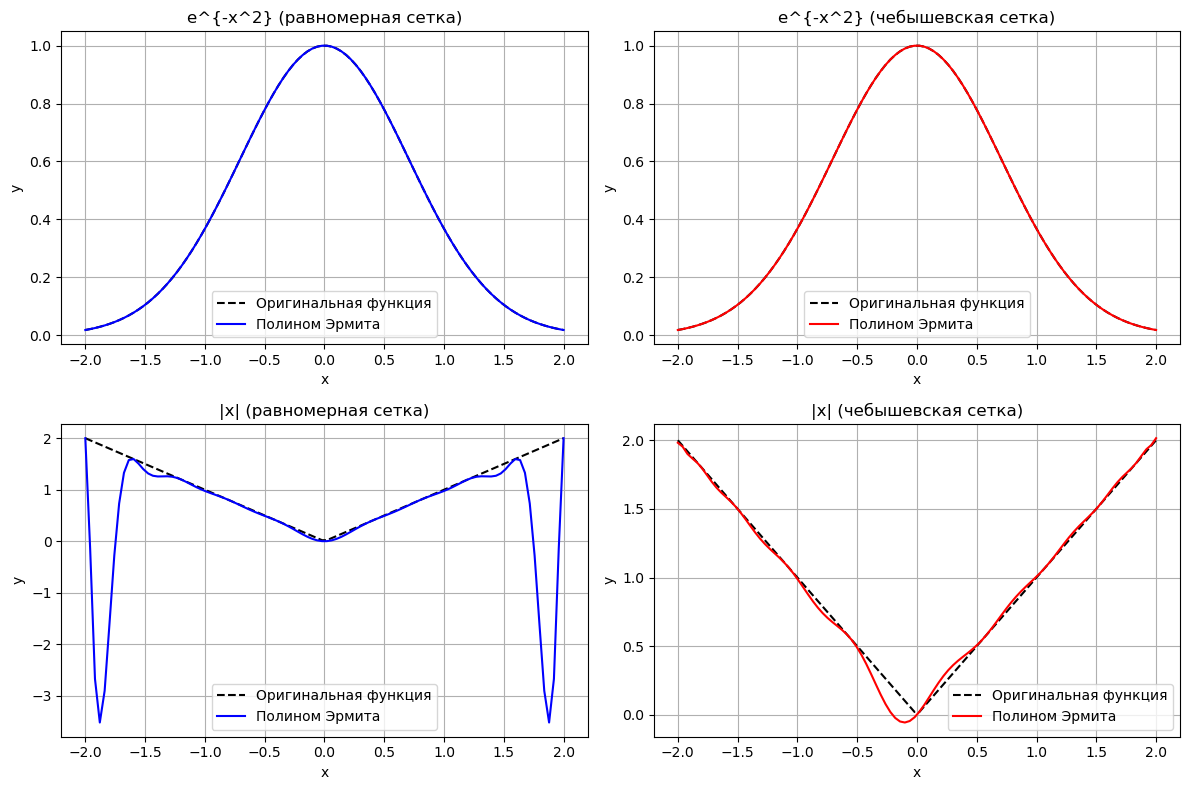

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из файла
data = []
with open("numm1_res.txt", "r") as file:
    next(file)  # Пропустить заголовок
    for line in file:
        parts = line.strip().split()
        x = float(parts[0])
        y_real = float(parts[1])
        y_hermite = float(parts[2])
        grid_type = parts[3]
        function_type = parts[4]
        data.append((x, y_real, y_hermite, grid_type, function_type))

# Разделение данных на группы
uniform_exp_data = [(x, y_real, y_hermite) for x, y_real, y_hermite, grid, func in data if grid == "uniform" and func == "exp(-x^2)"]
chebyshev_exp_data = [(x, y_real, y_hermite) for x, y_real, y_hermite, grid, func in data if grid == "chebyshev" and func == "exp(-x^2)"]
uniform_abs_data = [(x, y_real, y_hermite) for x, y_real, y_hermite, grid, func in data if grid == "uniform" and func == "|x|"]
chebyshev_abs_data = [(x, y_real, y_hermite) for x, y_real, y_hermite, grid, func in data if grid == "chebyshev" and func == "|x|"]

# Создание графиков
plt.figure(figsize=(12, 8))

# График для e^{-x^2} (равномерная сетка)
plt.subplot(2, 2, 1)
x_values = [point[0] for point in uniform_exp_data]
y_real_values = [point[1] for point in uniform_exp_data]
y_hermite_values = [point[2] for point in uniform_exp_data]
plt.plot(x_values, y_real_values, label="Оригинальная функция", color="black", linestyle="dashed")
plt.plot(x_values, y_hermite_values, label="Полином Эрмита", color="blue")
plt.title("e^{-x^2} (равномерная сетка)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# График для e^{-x^2} (чебышевская сетка)
plt.subplot(2, 2, 2)
x_values = [point[0] for point in chebyshev_exp_data]
y_real_values = [point[1] for point in chebyshev_exp_data]
y_hermite_values = [point[2] for point in chebyshev_exp_data]
plt.plot(x_values, y_real_values, label="Оригинальная функция", color="black", linestyle="dashed")
plt.plot(x_values, y_hermite_values, label="Полином Эрмита", color="red")
plt.title("e^{-x^2} (чебышевская сетка)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# График для |x| (равномерная сетка)
plt.subplot(2, 2, 3)
x_values = [point[0] for point in uniform_abs_data]
y_real_values = [point[1] for point in uniform_abs_data]
y_hermite_values = [point[2] for point in uniform_abs_data]
plt.plot(x_values, y_real_values, label="Оригинальная функция", color="black", linestyle="dashed")
plt.plot(x_values, y_hermite_values, label="Полином Эрмита", color="blue")
plt.title("|x| (равномерная сетка)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

# График для |x| (чебышевская сетка)
plt.subplot(2, 2, 4)
x_values = [point[0] for point in chebyshev_abs_data]
y_real_values = [point[1] for point in chebyshev_abs_data]
y_hermite_values = [point[2] for point in chebyshev_abs_data]
plt.plot(x_values, y_real_values, label="Оригинальная функция", color="black", linestyle="dashed")
plt.plot(x_values, y_hermite_values, label="Полином Эрмита", color="red")
plt.title("|x| (чебышевская сетка)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()